In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!echo '{"username":"luoliwangtw","key":"80cc1089e66ff33f3ab9136a56254eec"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d qianhuan/translation
!unzip translation.zip

Dataset URL: https://www.kaggle.com/datasets/qianhuan/translation
License(s): unknown
translation.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  translation.zip
replace translation2019zh/translation2019zh_train.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: translation2019zh/translation2019zh_train.json  y

replace translation2019zh/translation2019zh_valid.json? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: translation2019zh/translation2019zh_valid.json  


In [ ]:
!nvidia-smi

Wed Mar 19 22:37:46 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   65C    P0             29W /   70W |     102MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import tensorflow as tf

print("TensorFlow Version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))

TensorFlow Version: 2.18.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
if tf.test.is_gpu_available():
    print("GPU is available")
    tf.config.set_visible_devices(tf.config.list_physical_devices('GPU'), 'GPU')
    logical_devices = tf.config.list_logical_devices('GPU')
    print(len(logical_devices), "GPU(s) are available.")
else:
    print("GPU is NOT available")
    tf.config.set_visible_devices(tf.config.list_physical_devices('CPU'), 'CPU')

GPU is available
1 GPU(s) are available.


In [ ]:
import json
import pandas as pd

def jsontodf(json_filepath):
    json_list=[]

    #read the data line by line
    with open(json_filepath, 'r') as file:
        for idx,line in enumerate(file):
            json_list.append(line.strip())
    json_objects = [json.loads(json_str) for json_str in json_list]
    df = pd.DataFrame(json_objects)
    return df

huggingface_raw_data = jsontodf("/content/translation2019zh/translation2019zh_train.json")
display(huggingface_raw_data)

,english,chinese
0,"For greater sharpness, but with a slight incre...",为了更好的锐度，但是附带的会多一些颗粒度，可以使用这个显影剂的1：1稀释液。
1,"He calls the Green Book, his book of teachings...",他还把宣扬自己思想的所谓《绿皮书》称作“新福音书”。
2,And the light breeze moves me to caress her lo...,微风推着我去爱抚它的长耳朵
3,They have the blood of martyrs is the White to...,它们的先烈们的鲜血是白流了…
4,"Finally, the Lakers head to the Motor City to ...",最后，在1月31日，湖人将前往汽车城底特律挑战活塞队，活塞近来在东部排名第二。
...,...,...
5161429,Made with fresh spinach without any food colou...,菠菜 营养价值高，含有蛋白质、胡萝白素及其他维生素。
5161430,"And he said unto him, I am a Levite of Bethleh...",他回答说，从犹大的伯利恒来。 我是利未人，要找一个可住的地方。
5161431,"22th Sep. By the help of 69 Team, got the repo...",9月22日，在69自愿者廖平等的帮助下，已经取得当地水质检验报告；
5161432,I am crazy about Bruce Li.,我迷死李小龙了。


In [ ]:
import pandas as pd
huggingface_sampled_data = huggingface_raw_data.sample(frac=0.03, random_state=38)
display(huggingface_sampled_data)

,english,chinese
1553168,There are also problems in social interaction ...,也存在一些问题，在社会互动和非言语交际。
2694029,"But the bottom line is yes, he could be consid...",但底线是，是的，他可以被考虑在周日的名单中，这同样适用于佩佩。
5026308,Must be supplemented with protein and fluid in...,在规定的限额内，必须辅以蛋白质和液体以完全满足对异亮氨酸、亮氨酸、缬氨酸和水的需求。
1527046,"With Shanyou 63 and Wuyujing 3 as materials, t...",以汕优63和武育粳3号为材料，研究结实期水分胁迫和氮素营养对水稻产量和米质的影响。
1551619,And the financial support system of green powe...,从倾斜化的金融政策、多元化的金融供给主体、多样化的融资渠道三个角度构建了绿色电力产业发展的金...
...,...,...
1266872,Abstr: Jiuling 3ZP-0.8 type sugarcane cultivat...,文章摘要： 3ZP-0.8型甘蔗中耕培土机是广西贵港动力有限公司新研发的机型。
738044,And the good news about rising average life sp...,日本人的平均寿命延长，这是个好消息，但对人口规划来说却是坏消息，原因是很少的工人要供养越来越...
4230649,"Astonished, the people take the baby back and ...",对此，人们惊奇不已，于是又把他抱回来，给他取了这个名字叫“弃”。
2526875,Modifying the method is outside the scope of t...,然而修改这个方法并不在本文讨论的范围以内，因此我把这个留给你作为练习。


In [ ]:
import json

def jsontodf(json_filepath):
    json_list=[]
    with open(json_filepath, 'r') as file:
        for idx,line in enumerate(file):
            json_list.append(line.strip())
    json_objects = [json.loads(json_str) for json_str in json_list]

    df = pd.DataFrame(json_objects)
    return df

raw_data = jsontodf("/content/translation2019zh/translation2019zh_valid.json")
display(raw_data)

,english,chinese
0,"Slowly and not without struggle, America began...",美国缓慢地开始倾听，但并非没有艰难曲折。
1,I didn't own a Thesaurus until four years ago ...,直到四年前我才有了一本词典。我使用的是用89美分在K市场里买来的一本韦氏小词典。我从来不使用...
2,"portlet, you must write three short deployment...",portlet 之后，您必须编写三个简短的部署描述符：web.xml、portlet.xml...
3,Dithering is a technique that blends your colo...,抖动是关于颜色混合的技术，使你的作品看起来更圆滑，或者只是创作有趣的材质。
4,This paper discusses the petrologic characteri...,本文以珲春早第三纪含煤盆地的地质构违背景为依据，分析了煤系地层的岩石学特征。
...,...,...
39318,The bill will now have to be passed by the Upp...,目前，这项法案还必须获得印度议会上院的通过。
39319,The influences of thermal debinding temperatur...,研究了热脱脂温度、时间、不同脱脂方式以及粘结剂组成对脱脂坯碳含量的影响。
39320,The man and woman are short and heigh .,这个男人，和这个女人都和瘦长。
39321,That same old-fashioned car that I had seen ea...,我之前看见的那辆老式轿车还停在原来的地方，也就是警察局对面。


In [ ]:
import re
def contains_english_or_number(text):
    pattern = r"^(?=.*[a-zA-Z])|(?=.*\d).+$"
    return bool(re.match(pattern, text))
huggingface_sampled_data["contains_english_or_number"] = huggingface_sampled_data["chinese"].apply(contains_english_or_number)
huggingface_filtered_df = huggingface_sampled_data[~huggingface_sampled_data["contains_english_or_number"]]

huggingface_filtered_df = huggingface_filtered_df.drop(columns=["contains_english_or_number"])

display(huggingface_filtered_df)

,english,chinese
1553168,There are also problems in social interaction ...,也存在一些问题，在社会互动和非言语交际。
2694029,"But the bottom line is yes, he could be consid...",但底线是，是的，他可以被考虑在周日的名单中，这同样适用于佩佩。
5026308,Must be supplemented with protein and fluid in...,在规定的限额内，必须辅以蛋白质和液体以完全满足对异亮氨酸、亮氨酸、缬氨酸和水的需求。
1551619,And the financial support system of green powe...,从倾斜化的金融政策、多元化的金融供给主体、多样化的融资渠道三个角度构建了绿色电力产业发展的金...
562526,The result shows that the performance of the d...,分析结果表明，探测器的性能成为限制凝视型非制冷热像仪性能的关键因素。
...,...,...
2345682,[Agencies 2008-07-31 09:26 ]--The growth in in...,美国“梦之队”主教练迈克•克尔泽维斯基于本周一称，由于各国篮球人才的迅速成长，美国男篮奥运夺...
738044,And the good news about rising average life sp...,日本人的平均寿命延长，这是个好消息，但对人口规划来说却是坏消息，原因是很少的工人要供养越来越...
4230649,"Astonished, the people take the baby back and ...",对此，人们惊奇不已，于是又把他抱回来，给他取了这个名字叫“弃”。
2526875,Modifying the method is outside the scope of t...,然而修改这个方法并不在本文讨论的范围以内，因此我把这个留给你作为练习。


In [ ]:
raw_data["contains_english_or_number"] = raw_data["chinese"].apply(contains_english_or_number)
filtered_df = raw_data[~raw_data["contains_english_or_number"]]
filtered_df = filtered_df.drop(columns=["contains_english_or_number"])

display(filtered_df)

,english,chinese
0,"Slowly and not without struggle, America began...",美国缓慢地开始倾听，但并非没有艰难曲折。
3,Dithering is a technique that blends your colo...,抖动是关于颜色混合的技术，使你的作品看起来更圆滑，或者只是创作有趣的材质。
4,This paper discusses the petrologic characteri...,本文以珲春早第三纪含煤盆地的地质构违背景为依据，分析了煤系地层的岩石学特征。
6,"Ruben: So, to heal (with capital letters) you ...",所以，要“治疗“他人你必须没有任何偏好。
7,The second encounter relates to my grandfather...,第二次事件跟我爷爷的宝贝匣子有关。
...,...,...
39318,The bill will now have to be passed by the Upp...,目前，这项法案还必须获得印度议会上院的通过。
39319,The influences of thermal debinding temperatur...,研究了热脱脂温度、时间、不同脱脂方式以及粘结剂组成对脱脂坯碳含量的影响。
39320,The man and woman are short and heigh .,这个男人，和这个女人都和瘦长。
39321,That same old-fashioned car that I had seen ea...,我之前看见的那辆老式轿车还停在原来的地方，也就是警察局对面。


In [ ]:
filtered_df = pd.concat([filtered_df,huggingface_filtered_df])
display(filtered_df)

,english,chinese
0,"Slowly and not without struggle, America began...",美国缓慢地开始倾听，但并非没有艰难曲折。
3,Dithering is a technique that blends your colo...,抖动是关于颜色混合的技术，使你的作品看起来更圆滑，或者只是创作有趣的材质。
4,This paper discusses the petrologic characteri...,本文以珲春早第三纪含煤盆地的地质构违背景为依据，分析了煤系地层的岩石学特征。
6,"Ruben: So, to heal (with capital letters) you ...",所以，要“治疗“他人你必须没有任何偏好。
7,The second encounter relates to my grandfather...,第二次事件跟我爷爷的宝贝匣子有关。
...,...,...
2345682,[Agencies 2008-07-31 09:26 ]--The growth in in...,美国“梦之队”主教练迈克•克尔泽维斯基于本周一称，由于各国篮球人才的迅速成长，美国男篮奥运夺...
738044,And the good news about rising average life sp...,日本人的平均寿命延长，这是个好消息，但对人口规划来说却是坏消息，原因是很少的工人要供养越来越...
4230649,"Astonished, the people take the baby back and ...",对此，人们惊奇不已，于是又把他抱回来，给他取了这个名字叫“弃”。
2526875,Modifying the method is outside the scope of t...,然而修改这个方法并不在本文讨论的范围以内，因此我把这个留给你作为练习。


In [ ]:
from transformers import BertTokenizer
tokenizer_en = BertTokenizer.from_pretrained("bert-base-cased")
tokenizer_cn = BertTokenizer.from_pretrained("bert-base-chinese")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/269k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/624 [00:00<?, ?B/s]

In [ ]:
english_seqs = filtered_df["english"].apply(lambda x: tokenizer_en.encode(x, add_special_tokens=True, padding=False))
chinese_seqs = filtered_df["chinese"].apply(lambda x: tokenizer_cn.encode(x, add_special_tokens=True, padding=False))

In [ ]:
import pandas as pd

tokenized_df = pd.DataFrame({
    "english_tokens": english_seqs,
    "chinese_tokens": chinese_seqs
})

print("Tokenized sequences saved to tokenized_data.csv")

Tokenized sequences saved to tokenized_data.csv


In [ ]:
import math
MAX_TOKENIZE_LENGTH = max(english_seqs.str.len().max(),chinese_seqs.str.len().max())
MAX_TOKENIZE_LENGTH = pow(2, math.ceil(math.log(MAX_TOKENIZE_LENGTH)/math.log(2)))
EMBEDDING_DEPTH = 256


print(MAX_TOKENIZE_LENGTH)
print(EMBEDDING_DEPTH)

256
256


In [ ]:
cn_set_start = chinese_seqs.apply(lambda x:x[:-1])
cn_set_end = chinese_seqs.apply(lambda x:x[1:])

#for chinese to english translation
en_set_start = english_seqs.apply(lambda x:x[:-1])
en_set_end = english_seqs.apply(lambda x:x[1:])

def add_padding(token_list, max_length):
    if len(token_list) < max_length:
        padding_length = max_length - len(token_list)
        token_list = token_list + [0] * padding_length
    else:
        token_list = token_list[:max_length]
    return token_list

chinese_seqs = chinese_seqs.apply(lambda x: add_padding(x,MAX_TOKENIZE_LENGTH))
english_seqs = english_seqs.apply(lambda x: add_padding(x,MAX_TOKENIZE_LENGTH))

cn_set_start = cn_set_start.apply(lambda x: add_padding(x,MAX_TOKENIZE_LENGTH-1))
cn_set_end = cn_set_end.apply(lambda x: add_padding(x,MAX_TOKENIZE_LENGTH-1))

en_set_start = en_set_start.apply(lambda x: add_padding(x,MAX_TOKENIZE_LENGTH-1))
en_set_end = en_set_end.apply(lambda x: add_padding(x,MAX_TOKENIZE_LENGTH-1))

In [ ]:
print("=====chinese tokenized data=====")
print(chinese_seqs.iloc[0])
print(cn_set_start.iloc[0])
print(cn_set_end.iloc[0])

print("=====english tokenized data=====")
print(english_seqs.iloc[0])
print(en_set_start.iloc[0])
print(en_set_end.iloc[0])

=====chinese tokenized data=====
[101, 5401, 1744, 5353, 2714, 1765, 2458, 1993, 967, 1420, 8024, 852, 2400, 7478, 3766, 3300, 5680, 7410, 3289, 2835, 511, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[101, 5401, 1744, 5353, 2714, 1765, 2458, 1993, 967, 1420, 8024, 852, 2400, 7478, 3766, 3300, 5680, 7410, 3289, 2835, 511, 0, 0, 0, 0, 0,

In [ ]:
import tensorflow as tf

data_size = len(filtered_df)
train_size = int(0.95 * data_size)

print("Train size:", train_size)
print("Test size:", data_size - train_size)

batch_size = 32
en_tensor = tf.convert_to_tensor(list(english_seqs))
cn_tensor = tf.convert_to_tensor(list(chinese_seqs))
cn_start_tensor = tf.convert_to_tensor(list(cn_set_start))
cn_end_tensor = tf.convert_to_tensor(list(cn_set_end))
en_start_tensor = tf.convert_to_tensor(list(en_set_start))
en_end_tensor = tf.convert_to_tensor(list(en_set_end))

en_train, en_test = en_tensor[:train_size], en_tensor[train_size:]
cn_train, cn_test = cn_tensor[:train_size], cn_tensor[train_size:]
cn_start_train, cn_start_test = cn_start_tensor[:train_size], cn_start_tensor[train_size:]
cn_end_train, cn_end_test = cn_end_tensor[:train_size], cn_end_tensor[train_size:]
en_start_train, en_start_test = en_start_tensor[:train_size], en_start_tensor[train_size:]
en_end_train, en_end_test = en_end_tensor[:train_size], en_end_tensor[train_size:]

en_to_cn_train_set = tf.data.Dataset.from_tensor_slices(((en_train, cn_start_train), cn_end_train)).batch(batch_size)
cn_to_en_train_set = tf.data.Dataset.from_tensor_slices(((cn_train, en_start_train), en_end_train)).batch(batch_size)

en_to_cn_test_set = (
    tf.data.Dataset.from_tensor_slices(((en_test, cn_start_test), cn_end_test))
    .shuffle(train_size, reshuffle_each_iteration=True)
    .batch(batch_size)
)
cn_to_en_test_set = tf.data.Dataset.from_tensor_slices(((cn_test, en_start_test), en_end_test)).batch(batch_size)

print("EN to CN Train Set:")
for (en, cn), cn_label in en_to_cn_train_set.take(1):
    print(en.shape, cn.shape, cn_label.shape)

print("CN to EN Train Set:")
for (cn, en), en_label in cn_to_en_train_set.take(1):
    print(cn.shape, en.shape, en_label.shape)

Train size: 141522
Test size: 7449
EN to CN Train Set:
(32, 256) (32, 255) (32, 255)
CN to EN Train Set:
(32, 256) (32, 255) (32, 255)


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

class PositionalEmbedding(tf.keras.layers.Layer):
    def __init__(self, vocab_size, d_model):
        super().__init__()
        self.embed_layer = tf.keras.layers.Embedding(vocab_size, d_model, mask_zero=True)
        self.pos_encoding = self._build_pos_encoding(MAX_TOKENIZE_LENGTH, d_model)

    def _build_pos_encoding(self, max_len, d_model):
        pos = np.arange(max_len)[:, np.newaxis]
        i = np.arange(d_model)[np.newaxis, :]
        angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
        angle_rads = pos * angle_rates
        pos_enc = np.zeros((max_len, d_model))
        pos_enc[:, 0::2] = np.sin(angle_rads[:, 0::2])
        pos_enc[:, 1::2] = np.cos(angle_rads[:, 1::2])
        return tf.cast(pos_enc, tf.float32)

    def call(self, x):
        seq_len = tf.shape(x)[1]
        x = self.embed_layer(x)
        x *= tf.math.sqrt(tf.cast(tf.shape(x)[-1], tf.float32))
        return x + self.pos_encoding[tf.newaxis, :seq_len, :]

class AttentionBaseLayer(tf.keras.layers.Layer):
    def __init__(self, num_heads, key_dim, dropout_rate=0.1):
        super().__init__()
        self.mha = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=key_dim, dropout=dropout_rate)
        self.norm = tf.keras.layers.LayerNormalization()
        self.skip = tf.keras.layers.Add()

class CrossAttentionLayer(AttentionBaseLayer):
    def call(self, query, context):
        attn_output, attn_scores = self.mha(query=query, key=context, value=context, return_attention_scores=True)
        self.last_scores = attn_scores
        x = self.skip([query, attn_output])
        return self.norm(x)
class GlobalSelfAttentionLayer(AttentionBaseLayer):
    def call(self, x):
        attn_output = self.mha(query=x, key=x, value=x)
        return self.norm(self.skip([x, attn_output]))

class CausalSelfAttentionLayer(AttentionBaseLayer):
    def call(self, x):
        attn_output = self.mha(query=x, key=x, value=x, use_causal_mask=True)
        return self.norm(self.skip([x, attn_output]))

class FeedForwardNetwork(tf.keras.layers.Layer):
    def __init__(self, d_model, dff, dropout_rate=0.1):
        super().__init__()
        self.ffn_seq = tf.keras.Sequential([
            tf.keras.layers.Dense(dff, activation='relu'),
            tf.keras.layers.Dense(d_model),
            tf.keras.layers.Dropout(dropout_rate)
        ])
        self.norm = tf.keras.layers.LayerNormalization()
        self.skip = tf.keras.layers.Add()

    def call(self, x):
        return self.norm(self.skip([x, self.ffn_seq(x)]))

class TransformerEncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, dropout_rate=0.1):
        super().__init__()
        self.self_attn = GlobalSelfAttentionLayer(num_heads=num_heads, key_dim=d_model, dropout_rate=dropout_rate)
        self.ffn = FeedForwardNetwork(d_model, dff, dropout_rate)

    def call(self, x):
        x = self.self_attn(x)
        return self.ffn(x)

class TransformerEncoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, vocab_size, dropout_rate=0.1):
        super().__init__()
        self.pos_embed = PositionalEmbedding(vocab_size=vocab_size, d_model=d_model)
        self.enc_layers = [TransformerEncoderLayer(d_model, num_heads, dff, dropout_rate) for _ in range(num_layers)]
        self.dropout = tf.keras.layers.Dropout(dropout_rate)

    def call(self, x):
        # x: (batch_size, seq_len)
        x = self.pos_embed(x)
        x = self.dropout(x)
        for layer in self.enc_layers:
            x = layer(x)
        return x

class TransformerDecoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, dropout_rate=0.1):
        super().__init__()
        self.causal_attn = CausalSelfAttentionLayer(num_heads=num_heads, key_dim=d_model, dropout_rate=dropout_rate)
        self.cross_attn = CrossAttentionLayer(num_heads=num_heads, key_dim=d_model, dropout_rate=dropout_rate)
        self.ffn = FeedForwardNetwork(d_model, dff, dropout_rate)

    def call(self, x, encoder_out):
        x = self.causal_attn(x)
        x = self.cross_attn(x, encoder_out)
        # Cache attention scores from cross attention for plotting later.
        self.last_scores = self.cross_attn.last_scores
        return self.ffn(x)

class TransformerDecoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, vocab_size, dropout_rate=0.1):
        super().__init__()
        self.pos_embed = PositionalEmbedding(vocab_size=vocab_size, d_model=d_model)
        self.dec_layers = [TransformerDecoderLayer(d_model, num_heads, dff, dropout_rate) for _ in range(num_layers)]
        self.dropout = tf.keras.layers.Dropout(dropout_rate)
        self.last_scores = None

    def call(self, x, encoder_out):
        x = self.pos_embed(x)
        x = self.dropout(x)
        for layer in self.dec_layers:
            x = layer(x, encoder_out)
        self.last_scores = self.dec_layers[-1].last_scores
        return x

encoder = TransformerEncoder(
    num_layers=4,
    d_model=EMBEDDING_DEPTH,
    num_heads=8,
    dff=MAX_TOKENIZE_LENGTH,
    vocab_size=tokenizer_cn.vocab_size,
    dropout_rate=0.1)

encoder_output = encoder(cn)
print("Encoder Input shape:", cn.shape)
print("Encoder Output shape:", encoder_output.shape)

decoder = TransformerDecoder(
    num_layers=4,
    d_model=EMBEDDING_DEPTH,
    num_heads=8,
    dff=MAX_TOKENIZE_LENGTH,
    vocab_size=tokenizer_en.vocab_size,
    dropout_rate=0.1)

decoder_output = decoder(en, encoder_output)
print("Decoder Input shape:", en.shape)
print("Decoder Output shape:", decoder_output.shape)

print("Last attention scores shape:", decoder.last_scores.shape)


Encoder Input shape: (32, 256)
Encoder Output shape: (32, 256, 256)
Decoder Input shape: (32, 255)
Decoder Output shape: (32, 255, 256)
Last attention scores shape: (32, 8, 255, 256)


In [ ]:
import tensorflow as tf

# Clear previous custom objects using tf.keras.utils
tf.keras.utils.get_custom_objects().clear()

@tf.keras.utils.register_keras_serializable()
class Transformer(tf.keras.Model):
    def __init__(self, *, num_layers, d_model, num_heads, dff,
                 input_vocab_size, target_vocab_size, dropout_rate=0.1):
        super().__init__()
        self.encoder = TransformerEncoder(num_layers=num_layers, d_model=d_model,
                               num_heads=num_heads, dff=dff,
                               vocab_size=input_vocab_size,
                               dropout_rate=dropout_rate)

        self.decoder = TransformerDecoder(num_layers=num_layers, d_model=d_model,
                               num_heads=num_heads, dff=dff,
                               vocab_size=target_vocab_size,
                               dropout_rate=dropout_rate)

        self.final_layer = tf.keras.layers.Dense(target_vocab_size)

    def call(self, inputs, training=False):
        context, x = inputs

        context = self.encoder(context)

        x = self.decoder(x, context)

        logits = self.final_layer(x)

        try:
            del logits._keras_mask
        except AttributeError:
            pass

        return logits

In [ ]:
num_layers = 1
d_model = EMBEDDING_DEPTH
dff = MAX_TOKENIZE_LENGTH
num_heads = 3
dropout_rate = 0.1

cn_to_en_transformer = Transformer(
    num_layers=num_layers,
    d_model=d_model,
    num_heads=num_heads,
    dff=dff,
    input_vocab_size=tokenizer_cn.vocab_size,
    target_vocab_size=tokenizer_en.vocab_size,
    dropout_rate=dropout_rate)

output = cn_to_en_transformer((cn, en))

print(en.shape)
print(cn.shape)
print(output.shape)

attn_scores = cn_to_en_transformer.decoder.dec_layers[-1].last_scores
print(attn_scores.shape)

(32, 255)
(32, 256)
(32, 255, 28996)
(32, 3, 255, 256)


In [ ]:
cn_to_en_transformer.summary()

Model: "transformer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ transformer_encoder_1                │ ?                           │       6,330,368 │
│ (TransformerEncoder)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_decoder_1                │ ?                           │       9,134,080 │
│ (TransformerDecoder)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (32, 255, 28996)            │       7,451,972 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,916,420 (87.42 MB)

 Trainable params: 22,916,420 (87.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf

@tf.keras.utils.register_keras_serializable()
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super().__init__()

        self.d_model = tf.cast(d_model, tf.float32)
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        step = tf.cast(step, tf.float32)
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)
        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

    def get_config(self):

        d_model_val = int(self.d_model.numpy()) if hasattr(self.d_model, 'numpy') else self.d_model
        return {
            'd_model': d_model_val,
            'warmup_steps': self.warmup_steps
        }


learning_rate = CustomSchedule(EMBEDDING_DEPTH)

@tf.keras.utils.register_keras_serializable()
class CustomAdam(tf.keras.optimizers.Adam):
    def __init__(self, custom_param, **kwargs):
        super().__init__(**kwargs)

        self.custom_param = custom_param

    def get_config(self):
        config = super().get_config()
        config.update({
            'custom_param': self.custom_param
        })
        return config

optimizer = CustomAdam(
    learning_rate,
    beta_1=0.9,
    beta_2=0.98,
    epsilon=1e-9
)
cn_to_en_transformer.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=optimizer,
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

history = cn_to_en_transformer.fit(
    cn_to_en_train_set,
    epochs=10,
    validation_data=cn_to_en_test_set
)

Epoch 1/10
4423/4423 ━━━━━━━━━━━━━━━━━━━━ 1001s 219ms/step - loss: 0.7635 - sparse_categorical_accuracy: 0.9156 - val_loss: 0.5468 - val_sparse_categorical_accuracy: 0.9214
Epoch 2/10
4423/4423 ━━━━━━━━━━━━━━━━━━━━ 917s 207ms/step - loss: 0.5367 - sparse_categorical_accuracy: 0.9221 - val_loss: 0.5371 - val_sparse_categorical_accuracy: 0.9220
Epoch 3/10
4423/4423 ━━━━━━━━━━━━━━━━━━━━ 917s 207ms/step - loss: 0.5210 - sparse_categorical_accuracy: 0.9230 - val_loss: 0.5333 - val_sparse_categorical_accuracy: 0.9224
Epoch 4/10
4423/4423 ━━━━━━━━━━━━━━━━━━━━ 914s 207ms/step - loss: 0.5127 - sparse_categorical_accuracy: 0.9235 - val_loss: 0.5323 - val_sparse_categorical_accuracy: 0.9225
Epoch 5/10
4423/4423 ━━━━━━━━━━━━━━━━━━━━ 913s 206ms/step - loss: 0.5071 - sparse_categorical_accuracy: 0.9239 - val_loss: 0.5319 - val_sparse_categorical_accuracy: 0.9226
Epoch 6/10
4423/4423 ━━━━━━━━━━━━━━━━━━━━ 920s 208ms/step - loss: 0.5025 - sparse_categorical_accuracy: 0.9243 - val_loss: 0.5304 - val_spa

In [ ]:
import tensorflow as tf
from google.colab import files

model_path = '/content/cn_to_en_transformer-test.h5'
cn_to_en_transformer.save(model_path, save_format='h5')

files.download(model_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!nvidia-smi

,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy,epoch
5,0.501535,0.924399,0.530440,0.922939,5
6,0.497833,0.924689,0.529720,0.923017,6
7,0.494684,0.924894,0.530388,0.922890,7
8,0.493410,0.924901,0.531971,0.922854,8
9,0.491114,0.925051,0.532249,0.922773,9


KeyError: 'masked_accuracy'

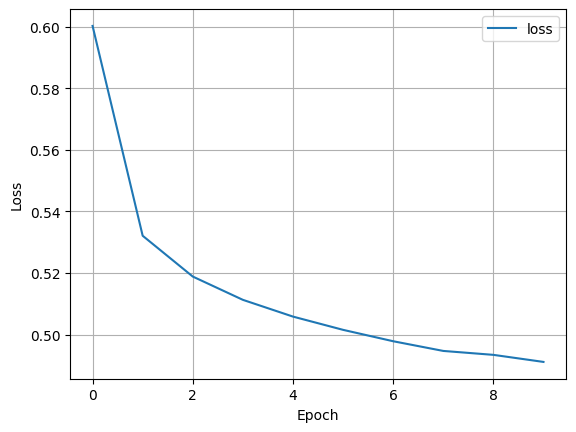

<Figure size 640x480 with 0 Axes>

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
display(hist.tail())

def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
def plot_accuracy(history):
    plt.plot(history.history['masked_accuracy'], label='masked_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

plt.figure()
plot_loss(history)
plt.figure()
plot_accuracy(history)

In [ ]:
def print_translation(sentence, tokens, ground_truth):
    print(f'{"Input:":15s}: {sentence}')
    print(f'{"Prediction":15s}: {tokens}')
    print(f'{"Ground truth":15s}: {ground_truth}')

In [ ]:
class Translator(tf.Module):
    def __init__(self, input_tonkenizer,output_tokenizer, transformer):
        self.input_tonkenizer = input_tonkenizer
        self.output_tokenizer = output_tokenizer
        self.transformer = transformer

    def __call__(self, sentence, max_length=MAX_TOKENIZE_LENGTH):
        # For input sentence , hence adding the `[START]` and `[END]` tokens.
        sentence = tf.constant(self.input_tonkenizer.encode(sentence, add_special_tokens=True))[tf.newaxis]
        encoder_input = sentence

        start_end = self.output_tokenizer.encode("", add_special_tokens=True)
        start = tf.constant(start_end[0],dtype=tf.int64)[tf.newaxis]
        end = tf.constant(start_end[1],dtype=tf.int64)[tf.newaxis]
        output_array = tf.TensorArray(dtype=tf.int64, size=0, dynamic_size=True)
        output_array = output_array.write(0, start)

        for i in tf.range(max_length):
            output = tf.transpose(output_array.stack())
#             print(output)
            predictions = self.transformer([encoder_input, output], training=False)

            # Select the last token from the `seq_len` dimension.
            predictions = predictions[:, -1:, :]  # Shape `(batch_size, 1, vocab_size)`.

            predicted_id = tf.argmax(predictions, axis=-1)

            output_array = output_array.write(i+1, predicted_id[0])

            if predicted_id == end:
                break

        output = tf.transpose(output_array.stack())
        # The output shape is `(1, tokens)`.
#         print(output.shape)
#         print(output)
        text = self.output_tokenizer.decode(output[0], skip_special_tokens=True)

        self.transformer([encoder_input, output[:,:-1]], training=False)
        attention_weights = self.transformer.decoder.last_scores

        return text, attention_weights

translator = Translator(tokenizer_cn,tokenizer_en, cn_to_en_transformer)

In [ ]:
sentence = "我们出去吃晚饭吧。"
ground_truth = 'Hello, Welcome to China'

translated_text, attention_weights = translator(sentence)
print_translation(sentence, translated_text, ground_truth)

Input:         : 我们出去吃晚饭吧。
Prediction     : We'll eat, you'll eat, you eat, you eat, you eat, you'll eat, you eat the eat, you eat, you eat, you eat the eat, you eat, you'll eat, and you '.'and you'and you'and you'and you'and you'and you'and you'and you'and you eat, you'and you'll eat, you'll eat the night, you'and you eat, you'and you'll eat the eat the eat the eat, you'and you'll eat the eat the eat, you eat, you'll eat, you'and you'and you'and you'and you eat the eat, you'll eat, you'and you'and you'and you'll eat, you'and you'll eat, you'and you'and you'll eat, you'll eat, you'and you'll eat, you'll eat, you'll eat, you'and you'll eat, you'll eat, you'll eat, you'll eat, you'll eat, you'll eat, you'and you'll eat, you
Ground truth   : Hello, Welcome to China
